# Propagation on the path graph

## Loading modules

In [2]:
using QSWalk
using PyPlot # for plot
using LightGraphs # for PathGraph

## Evolution on path graph for fixed time, global vs local interaction

Basic parameters. Note that *dim* should be an odd number. Otherwise the middle point *midpoint* is not unique. Matrix
*adjacency* can be alternatively generated as *adjacency = spdiagm((ones(dim-1), ones(dim-1)), (-1, 1))*.

In [3]:
dim = 251 # odd for unique middle point
midpoint = ceil(Int, dim/2)
w = 0.5
timepoint = 100.
adjacency = adjacency_matrix(PathGraph(dim));

Quantum stochastic walk: global interaction case. Note that *evolve_generator* requires a list of Lindblad operators, hence we need extra brackets around the second argument.

In [4]:
op_global = evolve_generator(adjacency, [adjacency], w)
rho_global = evolve(op_global, proj(midpoint, dim), timepoint);

Quantum stochastic walk: local interaction case. Note that here *lind_local* is already a list of Lindbladian operators, hence we do not need extra brackets, contrary to the global interaction example.

In [5]:
lind_local = classical_lindbladian(adjacency)
op_local = evolve_generator(adjacency, lind_local, w)
rho_local = evolve(op_local, proj(midpoint, dim), timepoint);

To plot the result of the cannonical measurement, we take a diagonal of the states. Note that both *rhoglobal* and *rholocal* are complex matrices, hence we need to take the real part only. Argument *positions* is generated assuming that *midpoint* (the initial position) is at 0. Note that we have very heavy tails in the global interaction case, which confirms fast propagation in this model.

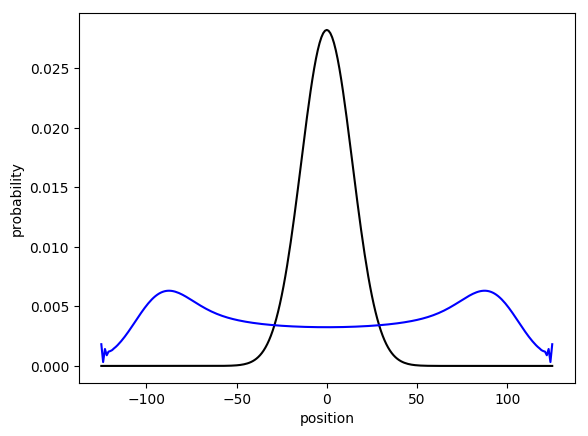

In [7]:
positions = (collect(1:dim) - midpoint)
plot(positions, real.(diag(rho_local)), "k")
plot(positions, real.(diag(rho_global)), "b")
xlabel("position")
ylabel("probability")
show()

## Evolution on path graph for fixed time, propagation analysis

Basic parameters. Note that *dim* should be an odd number. Otherwise the middle point *midpoint* is not unique. Matrix
*adjacency* can be alternatively generated as *adjacency = spdiagm((ones(dim-1), ones(dim-1)), (-1, 1))*.

In [10]:
dim = 251 #odd for unique middle point
midpoint = ceil(Int, dim/2)
w = 0.5
timepoints = collect(0:5:100)
adjacency = adjacency_matrix(PathGraph(dim));

Preparation of the global and the local interaction operators.

In [11]:
op_global = evolve_generator(adjacency, [adjacency], w)
lind_local = classical_lindbladian(adjacency)
op_local = evolve_generator(adjacency, lind_local, w);

Calculating resulting states. Note that comparing to global operators, density states usually are small matrices. Hence we can store those. Furthermore, note that here we use variant of *evolve* function, whcih enables us to compute the same evolutions for different time points.

In [12]:
global_states = evolve(op_global, proj(midpoint, dim), timepoints)
local_states = evolve(op_local, proj(midpoint, dim), timepoints);

Calculation of the second moment.

In [13]:
secmoment_global = Float64[]
secmoment_local = Float64[]
positions = (collect(1:dim) - midpoint)

for (rho_global, rho_local) = zip(global_states, local_states)
  push!(secmoment_global, sum(positions.^2 .* diag(rho_global)))
  push!(secmoment_local, sum(positions.^2 .* diag(rho_local)))
end

Plots of the results. Note that second moment for global interaction case grows ballistically.

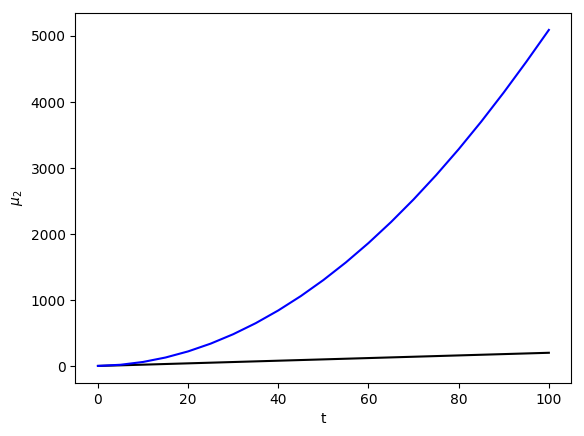

In [14]:
plot(timepoints, secmoment_local, "k")
plot(timepoints, secmoment_global, "b")
xlabel("t")
ylabel(L"\mu_2")
show()